## Method selection

In [54]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [65]:
btc = yf.download(tickers='BTC-USD', period='2h', interval='1m')

eth = yf.download(tickers='ETH-USD', period='2h', interval='1m')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [104]:
btc_func = 100 * btc['Open']/max(btc['Open'])
eth_func = 100 * eth['Open']/max(eth['Open'])

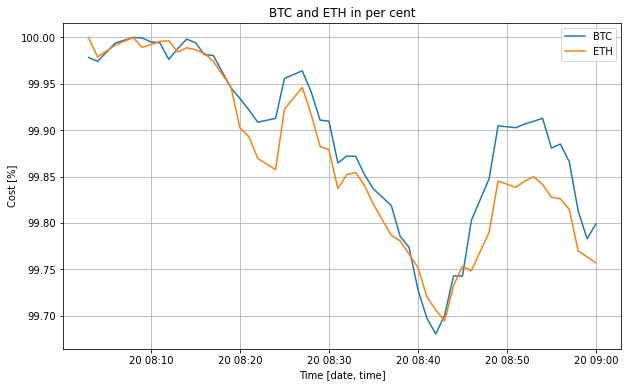

In [110]:
fig = plt.figure(figsize=(10, 6))

plt.plot(btc_func, label='BTC')
plt.plot(eth_func, label='ETH')

plt.title('BTC and ETH in per cent')
plt.xlabel('Time [date, time]')
plt.ylabel('Cost [%]')

plt.legend()
plt.grid()

plt.show()

In [106]:
result = pd.DataFrame(eth_func - btc_func)
result = result[np.isnan(result['Open']) == False]

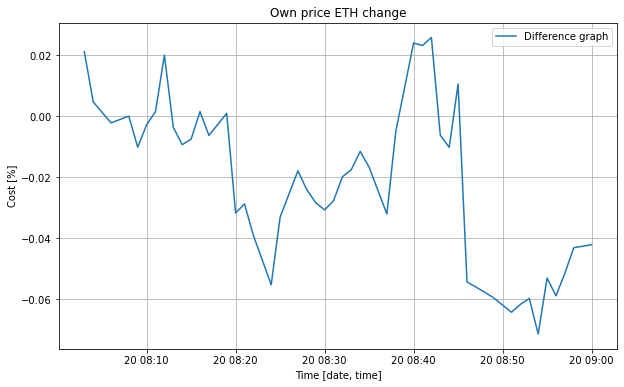

In [111]:
fig = plt.figure(figsize=(10, 6))

plt.plot(result, label='Difference graph')

plt.title('Own price ETH change')
plt.xlabel('Time [date, time]')
plt.ylabel('Cost [%]')

plt.legend()
plt.grid()

plt.show()

## Result code

In [ ]:
import time
import yfinance as yf

PER_CENT_VALUE = 1
TIME_UPDATE = 1  # seconds

while True:
    # downloading data
    btc = yf.download(tickers='BTC-USD', period='2h', interval='1m', progress=False)
    eth = yf.download(tickers='ETH-USD', period='2h', interval='1m', progress=False)
    
    # method applycation
    btc_func = 100 * btc['Open']/max(btc['Open'])
    eth_func = 100 * eth['Open']/max(eth['Open'])
    result = (eth_func - btc_func)
    
    # result
    if abs(result[-1] - result[0]) > PER_CENT_VALUE:
        print('The price change is more than {}%!'.format(PER_CENT_VALUE))

    time.sleep(TIME_UPDATE)